# Part 2: HIV Simulations Using Mean-Field Model

## Introduction

Modeling in HIV has proven to be helpful in many ways. Specifically the authors of [1] note that because of insights gained from modeling they conclude that more emphasis needs to be put on finding a vaccine instead of treatment. This conduction was made because models show that viral loads persist even in long term simulations.

Modelling HIV dynamics are useful to compare the efficency levels of different treatments. Paper [2] explores the HIV models of patients that are treated with Highly Active Antiretroviral Therapy (HAART). According to paper, patients mostly achieve undetectable viral loads when they are treated with HAART for long periods of time.

Both of the papers referenced, review developments in HIV modeling. They display the quantitative discoveries about HIV, the rate of generation of HIV variants, treatments and response to drug therapy. In this tutorial we are simulating the HIV models from papers [1] and [2] by using the Mean-field Model to observe characteristics of HIV infection and to provide insight into the treatments.

## Background

In implementing the discrete and continuous simulations of three HIV models including the models both before and after treatment, the following papers are used:

[1]Perelson, Alan S., and Ruy M. Ribeiro. "Modeling the within-host dynamics of HIV infection." BMC biology 11.1 (2013): 96. https://link.springer.com/content/pdf/10.1186/1741-7007-11-96.pdf

[2]Di Mascio, Michele, et al. "Modeling the long-term control of viremia in HIV-1 infected patients treated with antiretroviral therapy." Mathematical biosciences 188.1-2 (2004): 47-62.
https://www.sciencedirect.com/science/article/pii/S0025556403001305

In [25]:
import numpy as np
import matplotlib.pyplot as plt

## First HIV model -- Modeling virus growth and infected cells.

Following the notation from we can begin to implement our first model using the notation and equations from [1]

In first HIV model initially each cell has two types of possible states which are "T" and "I". "T" represents the uninfected target cells while "I" represents the infected cells."T" cells are mostly CD4+ T cells which are susceptible for infection. "V" represents the free virus. In a mean-field model, you would first define a time-dependent variable for each cell states which you interpret as the fraction of the population in that state and a dependent variable for the virus. That is, let   

- $T_t$ be the fraction of the cells that is susceptible at (discrete) time $t$;
- $I_t$ be the fraction that is infected at $t$; and
- $V_t$ be the fraction of virus at $t$,

where $T_t + I_t = 1$ since infected cells $I$ and uninfected target cells $T$ are complementary we always only need to compute one in order to compute the other. We will implicitly assume that the number of individuals is large enough that we can treat these fractions as being continuous.



- $\lambda$ is a parameter that represents the constant rate per cell that T cells are produced 
- $d_T$ is a parameter that represents the die rate of T cells per cell
- $\beta V T$ represents the rate that T cells get infected by free virus
- $\delta$ is the rate that I cells are lost
- $p$ is the rate per cell that V (free viruses) are produced by I cells
- $c$ is the rate per virus that V are cleared from circulation 

Then, a corresponding discrete-time dynamical system might be

$$
\begin{eqnarray}
  T_{t+1} & \equiv & T_t + \lambda - d_{T} T_t - \beta V_t T_t \\
  I_{t+1} & \equiv & I_t + \beta V_t T_t \ - \delta I_t \\
  V_{t+1} & \equiv & V_t + p I_t - c V_t
\end{eqnarray}
$$

The first step will be to define a discrete logical mapping F_hiv_1 by using the differential equations from [1]

In [48]:
def F_hiv_1(x,t, lambda_l, d_t, beta, p, c):
    """
    Description:Logical map to find discrete values for time t+1 by using time t values for T cells, 
                Viral load and infected cells. I variable is implicitly calculated by using T values 
                since they are complementary to each other.
    Input: Numpy array x with T and V variables and parameters of models. 
    Output:The future values of T, and V stored in the Numpy array called x_next. 
    
    """
    # x = (T, V)
    x_next = x.copy ()
    
    ### BEGIN SOLUTION
    T, V = 0, 1
    I    = 1 - x[T] #we can always easily recover I
    x_next[T] = max(0, x[T] + (lambda_l - d_t*x[T]- beta*x[V]*x[T]))                                       
    x_next[V] = max(0, x[V] + p*I - c*x[V])
    ### END SOLUTION
    
    return x_next

Now that we have a logical map we need to write a simulation function which steps the logical map forward in time.
Below function returns the T and V values in discrete time steps for the selected HIV model.

In [49]:
def sim(fun, t_max, x0, **fun_args):
    
    """
    Description:Simulating a discrete model.
    Input: fun representing the function for logical map,
           t_max for number of iterations of time,
           x0 as the initial values for state variables 
           **fun_args for set of parameters that the logical map takes
    Output:2D Numpy array X representing simulation values. Rows are time and columns are state variables.
    
    """
    X = np.zeros ((len(x0), t_max+1))


    X[:, 0] = np.array (x0) #initial conditions
    for t in range (t_max):
        X[:, t+1] = fun(X[:, t],t, **fun_args) 

    return X

Now we will create a plotting function to visualize the results of our discrete simulation of the First HIV model described above.

In [50]:
def plot_sim_1 (X,alpha, t, d_t, beta,p, c):
    
    """
    Description:Plotting the discrete model.2D Plot of the simulation values including
                T, V and I values on y axis versus time on x axis.
    Input:X as 2D numpy array to plot simulation values that contains the following:
              in X[0, :] Susceptible T-cells   T   
              in X[1, :] Viral load            V     
              in X[2, :] Infected cells        I   
    Output:none
    
    """
    
    t_max = X.shape[1] - 1
    
    T = np.arange (t_max+1)
    use_points = len (T) <= 30
    plt.plot (T, X[0, :], 'ys--' if use_points else 'y-')
    plt.plot (T, X[1, :], 'r*--' if use_points else 'r--')
    plt.plot (T, 1. - X[0, :], 'bo--' if use_points else 'b--')
    plt.legend (['T', 'V', 'I'])
    plt.xlabel('Time')
    plt.ylabel('Virus and Cell Loads')
    #plt.axis ([0, t_max+1, 0, 1])
    #plt.title ("alpha = {}, tau = {}, kappa = {}".format (alpha, tau, kappa))
    

Now we can set up some constants for our discrete First HIV model provided above and run our simulation with these values and observe the plot including the change of state variables which are $T$ as T-cells which are susceptible cells for infection, $V$ as viral load and $I$ as infected cells . 

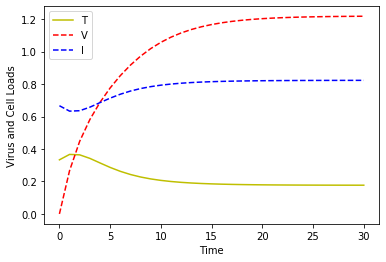

In [51]:
T_MAX = 30

ALPHA = 1. / 3
LAMBDA_L= 0.1
D_T = 0.2
BETA = 0.3
P = 0.4
C = 0.27

# X[:, t] = [T_t, V_t]  
x0 = np.array ([ALPHA, 0])

#create simulation data
X = sim (F_hiv_1,T_MAX, x0, lambda_l=LAMBDA_L, d_t=D_T, beta=BETA, p=P, c=C)

#plot simulation data
plot_sim_1 (X, ALPHA, LAMBDA_L, D_T,BETA, P, C)

From the discrete simulation plot above, we observe that number of infected cells grow as the viral load grows over time. In accordance with this the number of susceptible cells which are T cells decreases over time. Before we continue our observations we will also implement a continous version of this simulation that is based on the ordinary differential equations solver from numpy.

## Implementation for continuous time

Next, suppose we wish to treat time as a continuous, rather than discrete, variable. Doing so gives rise to a system of ordinary differential equations (ODEs):


$$
\begin{eqnarray}
  \dfrac{d\vec{y}}{dt}
  = \dfrac{d}{dt}\left(\begin{matrix}
      T(t) \\
      I(t) \\
      V(t)
    \end{matrix}\right)
  & = & \left(\begin{matrix}
     \lambda - d_{T} T(t) - \beta V(t) T(t) \\
      \beta V(t) T(t) \ - \delta I(t)\\
      p I(t) - c V(t)
    \end{matrix}\right)
  \equiv \vec{F}(\vec{y}),
\end{eqnarray}
$$

where $\vec{y}(t)$ is the state vector.


- Use the initial population parameters $T(0) =\alpha$, $I(0) = 1-\alpha$, and $V(0) = 0$. These values are set in the `y0[:2]` array, below.
- $\alpha$ is the proportion of target cells that are alive.
- Store the results for $T(t)$, $I(t)$, and $V(t)$ for time points (i.e., including $t=0$) in three NumPy arrays named `T_ode[:31]`, `V_ode[:31]`, and `I_ode[:31]`, respectively. The plotting code below assume these names.

Below code implements the ODE simulation for the First HIV model in continuous case.

In [52]:
# Initial populations, i.e., [T(0), V(0)]
y0 = np.array ([ALPHA, 0])

from scipy.integrate import odeint

def F_hiv_ode (y, t,lambda_l, d_t,beta, p, c):
    return F_hiv_1 (y,t,lambda_l, d_t,beta, p, c) - y

# Time points at which to compute the solutions:
time = np.arange (31).astype (float)

Y = np.zeros ((2, len (time)))  
Y[:, 0] = y0[:2]

Y = odeint (F_hiv_ode,
            Y[:, 0],
            time,
            args=( LAMBDA_L, D_T, BETA, P, C)).T

T_ode = Y[0, :]
V_ode = Y[1, :]
I_ode = 1.0 - T_ode

In [53]:
def plot_sim_ode_1 (T, V, I, time):
    """
    Description: Plotting the continuous First HIV model state variables. 
    Input:1D numpy arrays for state variables T, V, and I for First HIV Model and 1D array "time" for time steps
    Output: none
    
    """
    t_max = time[-1]
    use_points = len (time) <= 35
    plt.plot (time, T, 'ys--' if use_points else 'y-')
    plt.plot (time, V, 'r*--' if use_points else 'r--')         
    plt.plot (time, 1. - T, 'bo--' if use_points else 'b--')
    plt.legend (['T', 'V', 'I'])
    plt.xlabel('Time')
    plt.ylabel('Virus and Cell Loads')
    #plt.axis ([0, t_max+1, 0, 1])
    #plt.title ("lambda_l = {}, d_t = {},beta={}, p={}, c={}".format(lambda_l, d_t,beta, p, c))

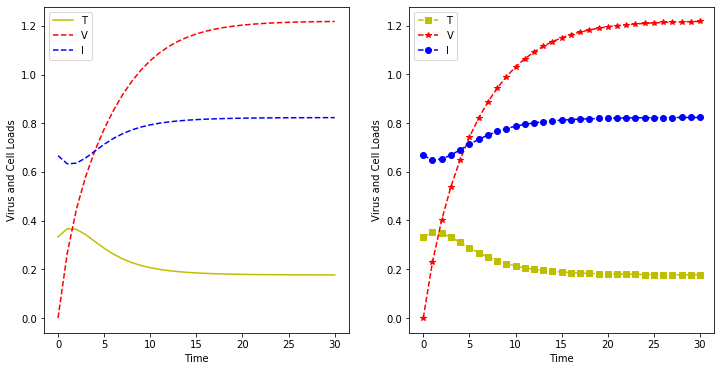

In [54]:
# Figure to compare discrete-time and continuous-time models
plt.figure (figsize=(12, 6))
plt.subplot (1, 2, 1)
plot_sim_1 (X, ALPHA, LAMBDA_L, D_T, BETA, P, C)
plt.subplot (1, 2, 2)
plot_sim_ode_1(T_ode, V_ode, I_ode, time)

Plot for discrete time model can be seen on the left hand-side and the continuous time model can be seen on right. We can observe from our simulation that T and I are complementary since a target cell will become and infected cell.

The other main observation is that once a steady state is reached, The virus will stay in the system forever. Our next model will look at what would happen if we start to give medicine to the patient in order to reduce the viral load V.

# Second HIV model -- Modeling treatment

In paper[2], we can find a model with differential equations that lets use observe the effect of treatment on the viral load on a patient. This treatment helps in a way to cause the $I$ cells to produce immature virus particles which are non-infectious and it can prevent the succesful infection of a cell as well as decreasing the virus level.To model this we will introduce new parameters, states and equations as follows:

- $V_{It}$ be the fraction of the Virus that is infectious (discrete) time $t$;
- $V_{NIt}$ be the fraction of the Virus that is non-infectious at $t$; and



where $V_{It} + V_{NIt}=1$ since infectious Virus $V_{It}$ and non-infectious Virus $V_{NIt}$ are complementary we always only need to compute one in order to compute the other. Here, we will also implicitly assume that the number of individuals is large enough that we can treat these fractions as being continuous.


- $\epsilon_{RT}$ is a parameter between 0 and 1 that represents the effectiviness of the inhibitor that prevents the establishment of productive infection of a cell. $\epsilon_{RT}=1$ implies 100% effective inhibitor. 
- $\epsilon_{PI}$ is a parameter that represents the effectiveness of protease inhibitor which prevents the maturation of HIV virions into infectious particles.
 
Then, a corresponding discrete-time dynamical system might be

$$
\begin{eqnarray}
  T_{t+1} & \equiv & T_t + \lambda - d_{T} T_t - (1-\epsilon_{RT}) \beta V_{It} T_t \\
  I_{t+1} & \equiv & I_t + (1-\epsilon_{RT}) \beta V_{It} T_t \ - \delta I_t \\
  V_{It+1} & \equiv &  V_{It} + (1-\epsilon_{PI}) p I_t - c V_{It}\\
  V_{NIt+1} & \equiv & V_{NIt} + \epsilon_{PI} p I_t - c V_{NIt} \\
\end{eqnarray}
$$



In [55]:
def F_hiv_2 (x,t,lambda_l, d_t,beta, p, c, eps_RT, eps_PI):
    
    """
    
    Description:Logical map for Second HIV Model to find discrete values in time t+1 by using time t 
                values for T cells, Viral load of infectious virus, viral load of non-infectious virus
                and infected cells. I variable is implicitly calculated by using T values since they are 
                complementary to each other.
    Input: x as 1D numpy array that will contain
              in x[0] Susceptible T-cells         T  
              in x[1] Infectious Viral load       V_i         
    Output: 1D numpy array x_next that returns state variables T and V_i values at time t+1 
    
    
    """
    
    # x = (T, V_i)
    x_next = x.copy ()

    T, V_i = 0, 1
    I = 1 - x[T] 
    x_next[T]   = max(0, x[T] + (lambda_l - d_t*x[T]-(1-eps_RT)*beta*x[V_i]*x[T]))                                                
    x_next[V_i] = max(0, x[V_i] + (1-eps_PI)*p*I - c*x[V_i])

    return x_next

In [56]:
def plot_sim_2 (X):
    
    """
    Description:Plotting the discrete model.2D Plot of the simulation values including T, V and I values 
                on y axis versus time on x axis.
    Input: X as 2D numpy array that will contain
                  in X[0, :] Susceptible T-cells    T   
                  in X[1, :] Infectious Viral load  V_i     
                  in X[2, :] Infected cells         I                         
    Output:none
    
    """
    t_max = X.shape[1] - 1
    
    T = np.arange (t_max+1)
    use_points = len (T) <= 30
    plt.plot (T, X[0, :], 'ys--' if use_points else 'y-')
    plt.plot (T, X[1, :], 'r*--' if use_points else 'r--')
    plt.plot (T, 1. - X[0, :], 'bo--' if use_points else 'b--')
    plt.legend (['T', 'V_i', 'I'])
    plt.xlabel('Time')
    plt.ylabel('Virus and Cell Loads')
    #plt.axis ([0, t_max+1, 0, 1])

## Implementation for continuous time

Next, suppose we wish to treat time as a continuous, rather than discrete, variable. Doing so gives rise to a system of ordinary differential equations (ODEs):
  

$$
\begin{eqnarray}
  \dfrac{d\vec{y}}{dt}
  = \dfrac{d}{dt}\left(\begin{matrix}
      T(t) \\
      I(t) \\
      V_I(t) \\
      V_{NI}(t)
    \end{matrix}\right)
  & = & \left(\begin{matrix}
      \lambda - d_{T} T(t) - (1-\epsilon_{RT}) \beta V_{I}(t) T(t) \\
      (1-\epsilon_{RT}) \beta V_{I}(t) T(t) \ - \delta I(t)  \\
      (1-\epsilon_{PI}) p I(t) - c V_{I}(t) \\
      \epsilon_{PI} p I(t) - c V_{NI}(t) 
    \end{matrix}\right)
  \equiv \vec{F}(\vec{y}),
\end{eqnarray}
$$

where $\vec{y}(t)$ is the state vector.

- Use the initial population parameters $T(0) =\alpha$ and $V_i(0)= 10$. These values are set in the `y0[:2]` array, below.
- $\alpha$ is the proportion of target cells that are alive.
- Store the results for $T(t)$ and $V_i(t)$ for time points (i.e., including $t=0$) in two NumPy arrays named `T_ode[:31]`and `V_i_ode[:31]` respectively. The plotting code below assume these names.

Make plotting function for continous simulation of second HIV model where we introduce the treatment modeled in paper[2]:

In [57]:
def plot_sim_2_ode (T, V_i, I, T_): 
    
    """
    Description: Plotting the continuous Second HIV model state variables. 
    Input: T, V_i, and I as 1D numpy arrays for state variables in Second HIV Model and 1D array T_ for time steps
    Output: none
    
    """
        
    t_max = T_[-1]
    use_points = len (T_) <= 35
    plt.plot (T_, T, 'ys--' if use_points else 'y-')
    plt.plot (T_, V_i, 'r*--' if use_points else 'r--')
    plt.plot (T_, 1. - T, 'bo--' if use_points else 'b--')
    plt.legend (['T', 'V_i', 'I'])
    plt.xlabel('Time')
    plt.ylabel('Virus and Cell Loads')
    #plt.axis ([0, t_max+1, 0, 1])
    #plt.title ("lambda_l = {}, d_t = {},beta={}, p={}, c={}, eps_RT={}, eps_PI={}".format(lambda_l, d_t,beta, p, c, eps_RT, eps_PI))
       

Prepare ODE function for continuous simulation of the Second HIV model:

In [58]:
### BEGIN SOLUTION
from scipy.integrate import odeint

def F_hiv_2_ode (y, t, lambda_l, d_t,beta, p, c, eps_RT, eps_PI):
    return F_hiv_2 (y, t,lambda_l, d_t,beta, p, c, eps_RT, eps_PI) - y


Now we can set up some constants and run our simulations for the Second HIV model that includes the treatment mentioned in paper[2]: 

In [59]:
ALPHA = 1. / 3
LAMBDA_L= 0.1
D_T = 0.2
BETA = 0.3
P = 0.4
C = 0.27
EPS_RT = 0.1
EPS_PI = 0.4

# X[:, t] = [T_t, V_i_t]  
x0 = np.array ([ALPHA, 10])

Run both discrete and continous simulations and plot for the Second HIV model. Once we run them we can use the plotting functions to display the state variables over time.

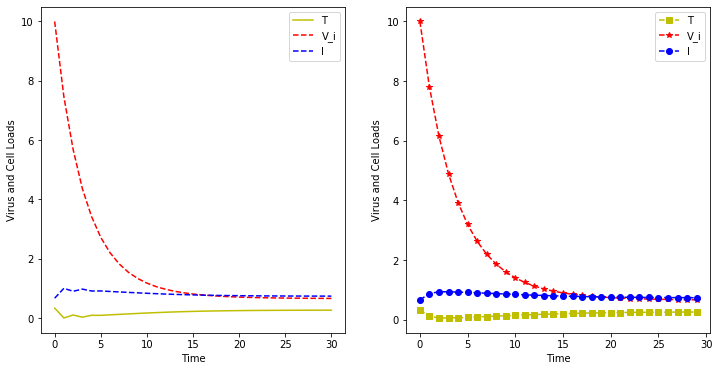

In [60]:
#create discrete simulation data
X = sim (F_hiv_2, T_MAX, x0, lambda_l=LAMBDA_L, d_t=D_T, beta=BETA, p=P, c=C, eps_RT = EPS_RT, eps_PI = EPS_PI )


time = np.arange (T_MAX).astype (float)
Y = np.zeros ((2, len (time)))  
Y[:, 0] = x0[:2]            
#create continous simulation data
Y = odeint (F_hiv_2_ode,
            Y[:, 0],
            time,
            args=(LAMBDA_L, D_T, BETA, P, C, EPS_RT, EPS_PI)).T


T_ode = Y[0, :]
V_i_ode = Y[1, :]
I_ode = 1.0 - T_ode
V_ni_ode = 1.0 - V_i_ode

#plot both simulations 
plt.figure (figsize=(12, 6))
plt.subplot (1, 2, 1)
plot_sim_2(X)
plt.subplot (1, 2, 2)
plot_sim_2_ode(T_ode, V_i_ode, I_ode, time)


Plot for discrete time model can be seen on the left hand-side and the continuous time model can be seen on right.  As we can observe, if we start from some viral load, the treatment will bring down the amount of virus down. 

According to [2], in real case scenarios we would observe a tapering off in the speed at which the virus is cleared out. The paper refers to this as phase 1 and phase 2. 
There are a few ways to model this but we will do it by introducing the latent cell M in the third HIV model below.

# Third HIV model -- Modeling treatment phases

In paper[2], we can find a model with differential equations that lets us observe the effect of treatment on the viral load on a patient also during phase 2 of viral load. Third HIV Model introduces productively infected cells $I$ ,long-lived infected cells $M^*$ and latently infected cells $L$ which means that these cells don't produce virions until they get activated. To model this we will introduce new parameters, states and equations as follows:

- $ M^* _t$ be the fraction of the cells that are long-lived infected cells $ M^*$ at $t$;
- $L_t$ be the fraction of the cells that are latent cells  $t$; 

The model we present below holds these:

- $V_{It} + V_{NIt}=1$ since infectious Virus $V_{It}$ and non-infectious Virus $V_{NIt}$ are complementary we always only need to compute one in order to compute the other. 
- Also $ M^* _t + I_t +L_t =1 $ Here, we will also implicitly assume that the number of individuals is large enough that we can treat these fractions as being continuous.

Introduction of new parameters:

- $\tau_{RT}$ and $\tau_{PI}$ represents the pharmacological delay which takes into account that antiretroviral drugs are not instantly active and the delay values may be different for reverse transcriptase inhibitors and protease inhibitors
- T (non-infected susceptible cells) and M (long-lived cells) cells remain constant during the observation
- $f_k$ is the parameter for the rate that L cells are produced
- $\delta_l$ is the constant rate that L cells die 
- k is the constant rate that I cells are generated
- $k_m$ is the constant rate that $M^*$ cells are generated
- $N \delta$ is the average rate per cell that I cells produce virus
- $p_{m}$ is the average rate per cell that $M^*$ cells produce virus
- $\delta$ is the constant rate that I cells are lost 
- $\mu$ is the constant rate that $M^*$ cells are lost 
- a is the constant rate that L cells are activated into productively infected cells
- c is the constant rate that both the infectious and non-infectious virions are cleared

 
Then, a corresponding discrete-time dynamical system is:

$$
\begin{eqnarray}
  I_{t+1} & \equiv & I_t + (1-\epsilon_{RT}h(t- \tau_{RT})) \beta T  V_{It} + a L_t - \delta I_t \\
  M^*_{t+1} & \equiv & M^*_t + (1-\epsilon_{RT}h(t- \tau_{RT})) k_M M V_{It} - \mu M^*_t \\
  L_{t+1} & \equiv & L_t + (1-\epsilon_{RT}h(t- \tau_{RT})) f_k T V_{It} -a L_t - \delta_L L_t \\ 
  V_{It+1} & \equiv &  V_{It} + (1-\epsilon_{PI}h(t- \tau_{PI})) N \delta I_t + (1-\epsilon_{PI}h(t- \tau_{PI})) p_M M^*_t -c V_{It}\\
  V_{NIt+1} & \equiv & V_{NIt} + \epsilon_{PI}h(t- \tau_{RT}) N \delta I_t +  \epsilon_{PI}h(t- \tau_{PI}) p_M M^*_t -cV_{NIt}\\
\end{eqnarray}
$$

where h(t- $\tau$) is a Heavyside function that takes 0 value for t< $\tau$ and 1 value for $t \geq \tau$.



In [61]:
def h(t,tau):  
    """
    Description: Heavyside function used in the Third HIV model.
    Input: Integer variable t as time and integer constant tau. 
    Output: 0 if t is less than tau and 1 if otherwise.
    """
    if(t<tau):
        a=0
    else:
        a=1
    return a

In [62]:
def F_hiv_3 (x, t, d_t, beta, c, eps_RT, eps_PI, a, beta_M, mu, N, p_M, tau_RT, tau_PI, T, M, f_k,delta, delta_L):
    """
    Description: Third HIV model in discrete time.
    Input: x as 1D numpy array that will contain
              in x[0] Infected cells   I   
              in x[1] Viral load       V_i     
              in x[2] Long lived cells M*  
              in x[3] Latent cells     L   
    Output: 1D numpy array x_next that returns state variables I, M_star, V_i and L values at time t+1
    """
    
    # x = (I, V_i, M_star, L)     
    x_next = x.copy ()

    I, V_i, M_star, L = 0, 1, 2, 3
    x_next[I]      = max(0, x[I] + (1-eps_RT*h(t,tau_RT))*beta*T*x[V_i]+ a*x[L]- delta*x[I] )
    x_next[M_star] = max(0, x[M_star] + (1-eps_RT*h(t,tau_RT))*beta_M* M*x[V_i]-mu*x[M_star])
    x_next[V_i]    = max(0, x[V_i] +(1-eps_PI*h(t,tau_PI))*N*delta*x[I] + (1-eps_PI*h(t,tau_PI))*p_M* x[M_star] - c*x[V_i])
    x_next[L]      = max(0, x[L] + (1-eps_RT*h(t,tau_RT))*f_k*T*x[V_i]-a*L-delta_L*x[L])
    return x_next

## Implementation for continuous time

Next, suppose we wish to treat time as a continuous, rather than discrete, variable. Doing so gives rise to a system of ordinary differential equations (ODEs):

$$
\begin{eqnarray}
  \dfrac{d\vec{y}}{dt}
  = \dfrac{d}{dt}\left(\begin{matrix}
      I(t) \\
      M^*(t) \\
      L(t) \\
      V_I(t) \\
      V_{NI}(t)
    \end{matrix}\right)
  & = & \left(\begin{matrix}
      (1-\epsilon_{RT}h(t- \tau_{RT})) \beta T  V_{I}(t) + a L(t) - \delta I(t) \\
      (1-\epsilon_{RT}h(t- \tau_{RT})) k_M M V_I(t) - \mu M^*(t) \\
      (1-\epsilon_{RT}h(t- \tau_{RT})) f_k T V_{I}(t) -a L(t) - \delta_L L(t) \\
      (1-\epsilon_{PI}h(t- \tau_{PI})) N \delta I(t) + (1-\epsilon_{PI}h(t- \tau_{PI})) p_M M^*(t) -c V_{I}(t) \\
      \epsilon_{PI}h(t- \tau_{RT}) N \delta I(t) +  \epsilon_{PI}h(t- \tau_{PI}) p_M M^*(t) -cV_{NI}(t)
    \end{matrix}\right)
  \equiv \vec{F}(\vec{y}),
\end{eqnarray}
$$

where $\vec{y}(t)$ is the state vector.

- Use the initial population parameters $I(0) = 1-\alpha$, $V_i(0) = 10 $, $M_{star}(0) =\alpha$,  and $L(0) = 0.1$. 
- $\alpha$ is the proportion of target cells that are alive.
- Store the results for $I_{ode}(t)$, $Vi_{ode}(t)$, $Mstar_{ode}(t)$ and $L_{ode}$ for time points (i.e., including $t=0$) in four NumPy arrays named `I_ode[:T_MAX]`, `V_i_ode[:T_MAX]`,`M_star_ode[:T_MAX] and L_ode[:T_MAX]`, respectively. The plotting code below assume these names.

In [63]:
def plot_sim_3 (X):
    
    """
    Description: Plotting the discrete model state variables. 
    Input: X as 2D numpy array that will contain
              in X[0, :] Infected cells   I   
              in X[1, :] Viral load       V_i     
              in X[2, :] Long lived cells M*  
              in X[3, :] Latent cells     L   
    Output: none
    """
    
    t_max = X.shape[1] - 1
    
    T = np.arange (t_max+1)
    use_points = len (T) <= 30
    plt.plot (T, X[0, :], 'ys--' if use_points else 'y-')
    plt.plot (T, X[1, :], 'r*--' if use_points else 'r--')
    plt.plot (T, X[2, :], 'bo--' if use_points else 'b--')
    plt.plot (T, X[3, :], 'go--' if use_points else 'g--')
    plt.legend (['I', 'V_i', 'M*','L'])
    plt.xlabel('Time')
    plt.ylabel('Virus and Cell Loads')
    #X[:, t] = [I_t, V_i_t, M_t, L_t] 

Prepare ODE for continous simulation of Third HIV Model:

In [64]:
#F_phase_2 (x, t, d_t, beta, c, eps_RT, eps_PI, a, beta_M, mu, N, p_M, tau_RT, tau_PI)

#Initial populations, i.e., [I(0), V_i(0), M_star(0), L(0)] 
y0 = np.array ([1.0 - ALPHA, 10 , ALPHA, .1 ])               

# Time points at which to compute the solutions:
time = np.arange (100).astype (float)

### BEGIN SOLUTION
from scipy.integrate import odeint

def F_phase_2_ode (y, t, d_t, beta, c, eps_RT, eps_PI, a, beta_M, mu, N, p_M, tau_RT, tau_PI, T, M, f_k, delta,delta_L): #bu t burdaydi
    return F_hiv_3  (y, t, d_t, beta, c, eps_RT, eps_PI, a, beta_M, mu, N, p_M, tau_RT, tau_PI, T, M, f_k,delta, delta_L) - y


Setup plotting for continous case:

In [65]:
def plot_sim_ode (I, V_i, M_star, L, time):
    
    """
    Description:Plotting the continous model state variables. 
    Input: I -> Numpy 1d array containing infected cell simulation values
         V_i -> Numpy 1d array containing viral load simulation values
      M_star -> Numpy 1d array containing long lived infected cells. 
           L -> Numpy 1d array containing latent cell simulation values
        time -> Numpy 1d array containing time steps that need to be plotted
    Output: none
    """
        
    t_max = time[-1]
    use_points = len (time) <= 35
    plt.plot (time, I, 'ys--' if use_points else 'y-')
    plt.plot (time, V_i, 'r*--' if use_points else 'r--')         
    plt.plot (time, M_star, 'bo--' if use_points else 'b--')
    plt.plot (time, L, 'go--' if use_points else 'g--')
    plt.legend (['I', 'V_i', 'M*', 'L'])
    plt.xlabel('Time')
    plt.ylabel('Virus and Cell Loads')
    #plt.axis ([0, t_max+1, 0, 1])

Now we can set up some simulation parameters such as running time and also we need to set the various model parameters. At the very bottom, we also intialize our state variables. 

In [66]:
T_MAX = 100

ALPHA     = 1. / 3
LAMBDA_L  = 0.1
D_T       = 0.2
BETA      = 0.3
P         = 0.4
C         = 0.27
EPS_RT  = EPS_PI = 0.8
A       = 0.5
BETA_M  = 0.3
MU      = 0.4
N_C     = 0.5
P_M     = 0.2
TAU_RT  = TAU_PI = 60
T_C     = 1
M_C     = 1
F_K     = 0.3
DELTA   = 0.1
DELTA_L = 0.4

T       = 1
M       = 1
f_k     = 0.3
delta   = 0.1
delta_L = 0.4

#X[:, t] = [I_t, V_i_t, M_t, L_t]
x0 = np.array ([1.0 - ALPHA, 10, ALPHA, 0.1])

Now we are ready to run both discrete and continous simulations. Once we run them we can use the plotting functions to display the state variables over time.

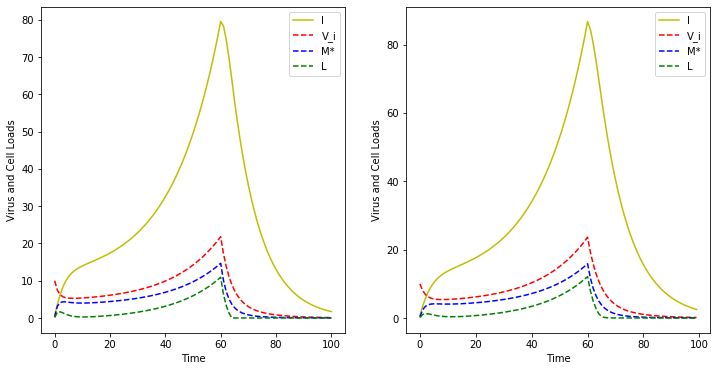

In [67]:
#create discrete simulation data
X = sim (F_hiv_3, T_MAX, x0, d_t=D_T, beta=BETA, c=C, eps_RT = EPS_RT, eps_PI = EPS_PI,
                               a=A, beta_M=BETA_M, mu=MU, N=N_C, p_M=P_M, tau_RT=TAU_RT,
                              tau_PI=TAU_PI, T=T_C, M=M_C, f_k=F_K,delta=DELTA, delta_L=DELTA_L)

Y = np.zeros ((4, len (time)))  
Y[:, 0] = x0[:4]            
#create continous simulation data
Y = odeint (F_phase_2_ode,
            Y[:, 0],
            time,
            args=(D_T, BETA, C, EPS_RT, EPS_PI, A, BETA_M, MU, N_C, P_M, TAU_RT,
                              TAU_PI, T_C, M_C, F_K, DELTA, DELTA_L)).T 


I_ode = Y[0, :]
V_i_ode = Y[1, :]
M_star_ode = Y[2, :] 
L_ode = Y[3, :] 

#plot both simulations 
plt.figure (figsize=(12, 6))
plt.subplot (1, 2, 1)
plot_sim_3(X)
plt.subplot (1, 2, 2)
plot_sim_ode(I_ode, V_i_ode, M_star_ode, L_ode, time)

Plot for discrete time model can be seen on the left hand-side and the continuous time model can be seen on right. As can be observed from the plots once the drug therapy kicks in the level of plasma virus is predicted to decay. After the treatment productively infected cells $I$ decay faster compared to the long lived infected cells $M^*$. Both from the plot and the paper [2] if these two populations of cells are assumed to be the only sources of virus, the second phase of decay extrapolates to zero residual infected cells in 2–3 years of completely suppressive antiretroviral therapy.
